In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.metrics import ConfusionMatrixDisplay

# Model libriaries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB



In [69]:
# Read the data
data = pd.read_csv("star_classification.csv")

In [70]:
data.shape

(100000, 18)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [72]:
data["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


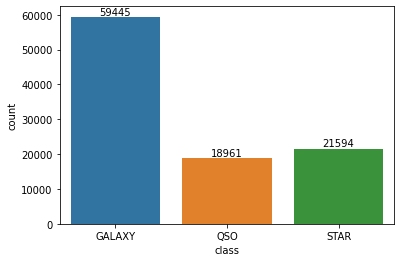

In [73]:
plot = sns.countplot(data["class"], label="Count")
plot.bar_label(plot.containers[0])
plt.show()

Preprocessing Data

In [74]:
# Dropping columns that are IDs or timestamp
data = data.drop(['obj_ID','field_ID','run_ID','rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'alpha', 'delta', 'plate'], axis=1) 

In [75]:
# Finding duplicate
duplicate = data[data.duplicated()]
duplicate

,u,g,r,i,z,class,redshift


In [77]:
# Replace class label "QSO" to "QUASARS"
data['class'].replace("QSO","QUASARS",inplace=True)

In [78]:
# Extract data label
classData = data["class"]

# Drop the class label
data.drop(["class"],axis=1, inplace=True)

In [79]:
#Scale the data
'''
NOTE: You can make this optional, scaling helped improve the accuracy. Try with scaling and without it
'''
data = scale(data)

Data Splitting

In [80]:
def split_data(train_size, valid_size, data, label):
    # Train-Test datasplit
    dataTrain, dataTest, classTrain, classTest = train_test_split(data, label, train_size=train_size, random_state=1, stratify=label)

    #Train-Validation datasplit
    dataTrain, dataValid, classTrain, classValid = train_test_split(dataTrain, classTrain, test_size=valid_size, random_state=1, stratify=classTrain)
    
    print("Train: ", dataTrain.shape[0])  
    print(classTrain.value_counts())
    print("Validation: ", dataValid.shape[0])  
    print(classValid.value_counts())
    print("Test: ", dataTest.shape[0])  
    print(classTest.value_counts())
    print("Dataset Size: ", data.shape[0])  
    
    return (dataTrain, dataValid, dataTest, classTrain, classValid, classTest)

In [81]:
# Split the data
dataTrain, dataValid, dataTest, classTrain, classValid, classTest = split_data(train_size=0.8, valid_size=0.2, data=data, label=classData)

Train:  64000
GALAXY     38045
STAR       13820
QUASARS    12135
Name: class, dtype: int64
Validation:  16000
GALAXY     9511
STAR       3455
QUASARS    3034
Name: class, dtype: int64
Test:  20000
GALAXY     11889
STAR        4319
QUASARS     3792
Name: class, dtype: int64
Dataset Size:  100000


Helper Methods

In [82]:
def predict(model, data, label):
    predict = model.predict(data)
    accuracy = accuracy_score(label, predict)
    
    return accuracy

In [83]:
def confusion_matrix(model, data, label):
    predict = model.predict(data)
    return confusion_matrix(label, predict)

Neural Network

In [84]:
def NeuralNetwork(data, classData, iteration=200, hidden_layers=1, layer_size=100):
    clf = MLPClassifier(hidden_layer_sizes=(layer_size,hidden_layers),max_iter=iteration)
    clf = clf.fit(data, classData)
    
    return clf


In [85]:
# Training the model and predicting on test data
NNModel = NeuralNetwork(dataTrain, classTrain, iteration=1000, hidden_layers=1, layer_size=50)
accuracy = predict(NNModel, dataTest, classTest)

print(accuracy)

0.9734


0.9726875


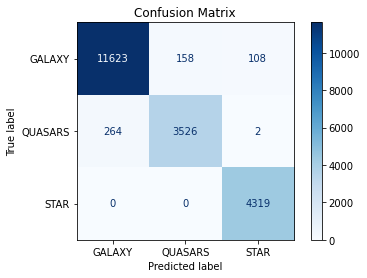

In [88]:
# predicting on validation data
accuracy = predict(NNModel, dataValid, classValid)
print(accuracy)

dsp = ConfusionMatrixDisplay.from_estimator(
    NNModel,
    dataTest,
    classTest,
    display_labels=['GALAXY', 'QUASARS', 'STAR'],
    cmap=plt.cm.Blues
)

dsp.ax_.set_title("Confusion Matrix")
plt.show()

In [17]:
# Test Accuracy vs Iterations
testAcc = []
trainAcc = []
validAcc = []

for iteration in range(100, 1001, 100):
    NNModel = NeuralNetwork(dataTrain, classTrain, iteration=iteration, hidden_layers=1, layer_size=32)
    
    # Training Accuracy
    accuracy = predict(NNModel, dataTrain, classTrain)
    trainAcc.append(accuracy)
    
    # Test Accuracy
    accuracy = predict(NNModel, dataTest, classTest)
    testAcc.append(accuracy)
    
    # Validation Accuracy
    accuracy = predict(NNModel, dataValid, classValid)
    validAcc.append(accuracy)


C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

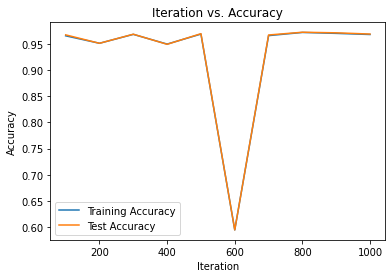

In [19]:
iteration = list(range(100,1001,100))

plt.plot(iteration,trainAcc,'-',iteration,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("Iteration vs. Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

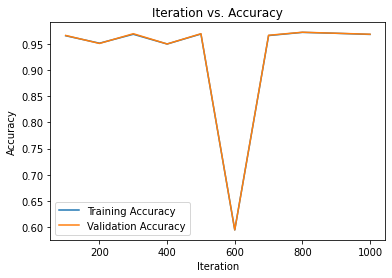

In [25]:
plt.plot(iteration,trainAcc,'-',iteration,validAcc,'-')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Iteration vs. Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

In [26]:
testAcc

[0.96765,
 0.9515,
 0.9689,
 0.94955,
 0.9699,
 0.59445,
 0.9674,
 0.97265,
 0.97155,
 0.9692]